In [ ]:
!pip install pillow

Enter your name: roxane


Saving equipe.png to equipe (1).png
Saving hieroglyphic-b.jpg to hieroglyphic-b (1).jpg
Saving N.png to N (1).png
Saving O.png to O (1).png
Image téléchargée : equipe (1).png
Image téléchargée : hieroglyphic-b (1).jpg
Image téléchargée : N (1).png
Image téléchargée : O (1).png
R
O
X
A
N
E


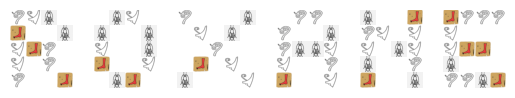

In [ ]:
#add multiple image in letter and create lists to use all images at least oncefrom PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random
from google.colab import files

#creation of each letter

lettres = {
    'A': [
        "0110",
        "1001",
        "1111",
        "1001",
        "1001"
    ],
    'B': [
        "11100",
        "10010",
        "11100",
        "10010",
        "11100"
    ],
    'C': [
        "0111",
        "1000",
        "1000",
        "1000",
        "0111"

    ],

    'D': [
        "1110",
        "1001",
        "1001",
        "1001",
        "1110"
    ],
    'E': [
        "1111",
        "1000",
        "1110",
        "1000",
        "1111"
    ],
    'F': [
        "1111",
        "1000",
        "1110",
        "1000",
        "1000"
    ],
    'G': [
        "0110",
        "1000",
        "1011",
        "1001",
        "0110"
    ],
    'H': [
        "1001",
        "1001",
        "1111",
        "1001",
        "1001"
    ],
    'I': [
        "0111",
        "0010",
        "0010",
        "0010",
        "0111"
    ],
    'J': [
        "0001",
        "0001",
        "0001",
        "1001",
        "0110"
    ],
    'K': [
        "1001",
        "1010",
        "1100",
        "1010",
        "1001"
    ],
    'L': [
        "1000",
        "1000",
        "1000",
        "1000",
        "1111"
    ],
    'M': [
        "10001",
        "11011",
        "10101",
        "10001",
        "10001"
    ],
    'N': [
        "1001",
        "1101",
        "1011",
        "1001",
        "1001"
    ],
    'O': [
        "0110",
        "1001",
        "1001",
        "1001",
        "0110"
    ],
    'P': [
        "1110",
        "1001",
        "1110",
        "1000",
        "1000"
    ],
    'Q': [
        "0110",
        "1001",
        "1001",
        "1011",
        "0111"
    ],
    'R': [
        "1110",
        "1001",
        "1110",
        "1010",
        "1001"
    ],
    'S': [
        "01110",
        "10000",
        "01100",
        "00010",
        "11100"
    ],
    'T': [
        "11111",
        "00100",
        "00100",
        "00100",
        "00100"
    ],
    'U': [
        "10010",
        "10010",
        "10010",
        "10010",
        "01100"
    ],
    'V': [
        "10001",
        "10001",
        "01010",
        "01010",
        "00100"
    ],
    'W': [
        "10001",
        "10101",
        "10101",
        "11011",
        "10001"
    ],
    'X': [
        "10001",
        "01010",
        "00100",
        "01010",
        "10001"
    ],
    'Y': [
        "10001",
        "01010",
        "00100",
        "00100",
        "00100"
    ],
    'Z': [
        "1111",
        "0001",
        "0010",
        "0100",
        "1111"
    ]
}

# create 2 lists one for all image and one for image that are already used
liste_images = []
image_used =[]

def afficher_lettre_en_pixels_avec_quadrillage(lettre, position_x, position_y, taille=150):
    # create letter with black square
    tableau_lettre = np.array([[int(pixel) for pixel in ligne] for ligne in lettre])

    for i in range(tableau_lettre.shape[0]):
        for j in range(tableau_lettre.shape[1]):
            if tableau_lettre[i, j] == 1:
                #if the list_images is not empty we select picture on this list and add the picture on the letter and on the list image_used and remove from list_image
                if liste_images:
                # Generate a random number for "index" in the list
                  indice_aleatoire = random.randint(0, len(liste_images) - 1)

                # Sélectionner l'image correspondante à l'indice aléatoire
                #select the picture
                  image = Image.open(liste_images[indice_aleatoire])
                  image = image.resize((taille, taille))
                  #to get the image the right way round we must flip it
                  image_tourne = image.transpose(Image.FLIP_TOP_BOTTOM)
                # replace in the black square
                  ax.imshow(image_tourne, extent=(position_x + j*taille, position_x + (j+1)*taille, position_y + i*taille, position_y + (i+1)*taille), cmap='binary', vmin=0, vmax=1)
                  image_used.append(liste_images[indice_aleatoire])
                  liste_images.remove(liste_images[indice_aleatoire])

                #else we take a picture on the list image_used
                else:
                  indice_aleatoire = random.randint(0, len(image_used) - 1)

                  image = Image.open(image_used[indice_aleatoire])
                  image = image.resize((taille, taille))
                  image_tourne = image.transpose(Image.FLIP_TOP_BOTTOM)
                  ax.imshow(image_tourne, extent=(position_x + j*taille, position_x + (j+1)*taille, position_y + i*taille, position_y + (i+1)*taille), cmap='binary', vmin=0, vmax=1)



    # create axes and turn off it
    ax.set_xticks(np.arange( -0.5, position_x + len(lettre[0]) * taille - 0.5, taille), minor=True)
    ax.set_yticks(np.arange(- 0.5, position_y + len(lettre) * taille - 0.5, taille), minor=True)
    ax.invert_yaxis()
    ax.axis('off')
    plt.draw()

mot = input("Enter your name: ")
# Demander à l'utilisateur de télécharger des images
uploaded = files.upload()
position_x = 0
position_y = 0

# Créer une figure et un axe une seule fois pour afficher toutes les lettres du mot
fig, ax = plt.subplots()


for filename in uploaded.keys():
    liste_images.append(filename)
    print(f"Image téléchargée : {filename}")

# Parcourt chaque lettre dans le mot et affiche chaque lettre sous forme de pixels
# capitalize all letters call the function to put letter in pixel with image inside
for lettre in mot.upper():
    print(lettre)
    if lettre in lettres:
        afficher_lettre_en_pixels_avec_quadrillage(lettres[lettre], position_x, position_y)
        position_x += len(lettres[lettre][0]) * 150 + 200  #manages the arrangement of letters in relation to the preceding one
    else:
        print("Lettre non prise en charge:", lettre)

plt.show()